# Ford GoBike Dataset; Explanatory Analysis

### Ahmed Zidane

## Introduction

Dataset overview: Information of Ford GoBike (Bay Wheels) trips done from January 2018 till March 2020

**Research Questions:**

    1. What is the trips trend over the past two years?
    2. Does this trend differs between different user types?
    3. What is the percentage share of each user type?
    4. What is the trend of bike rides over weekday?
    5. What are the peak hours of usage for each user type?

## Reading Master File

In [1]:
# used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
## reading CSV
df = pd.read_csv(r'/Users/ahmedzidane/Documents/Nanodegree/ford gobike/gobike_master_data.csv')
df.head(2)

,Unnamed: 0,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,start_station_id,start_station_latitude,...,start_station_name,start_time,user_type,duration_min,start_date,start_hour,day,month,year,weekday
0,0,1035,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.187,284.0,37.784872,...,Yerba Buena Center for the Arts (Howard St at ...,23:59:47.097000,Subscriber,10.0,2018-02-28,23,28,2,2018,Wednesday
1,1,1673,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.974,6.0,37.804770,...,The Embarcadero at Sansome St,23:21:16.495000,Customer,16.0,2018-02-28,23,28,2,2018,Wednesday


In [11]:
## checking that the file was imported completely 
df.shape[0]

5123610

In [20]:
## adjusting date data types
df['start_date'] = pd.to_datetime(df['start_date'],errors='coerce')
df['end_time'] = pd.to_datetime(df['end_time'],errors='coerce')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5123610 entries, 0 to 5123609
Data columns (total 21 columns):
Unnamed: 0                 int64
bike_id                    int64
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  object
duration_min               float64
start_date                 datetime64[ns]
start_hour                 int64
day                        int64
month                      int64
year                       int64
weekday                    object
dtypes: datetime64[ns](3), float64(7), int64(7), object(4)
memory usage: 820.9+ MB


## Insights

### Research Question 1: What is the trips trend over the past two years?

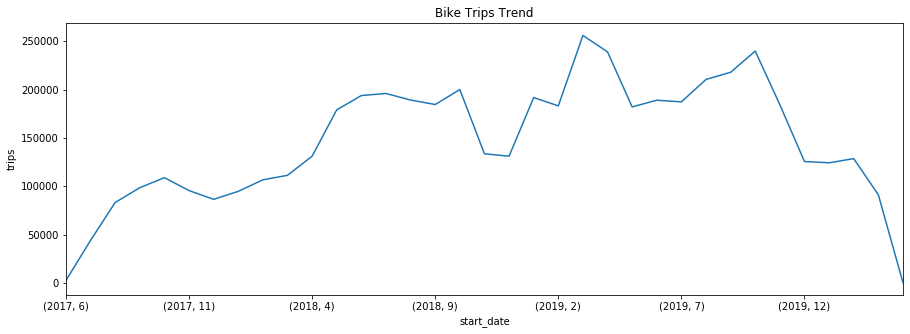

In [23]:
## plotting trend of bike trips since 2018 till now
group_by_date = df.groupby([df["start_date"].dt.year, df["start_date"].dt.month]).count()

group_by_date['bike_id'].plot(kind='line' ,figsize = (15,5) )

plt.xlabel('start_date')
plt.ylabel('trips')
plt.title('Bike Trips Trend')
plt.show()


#### Bike Trips have had an increasing trend over the years, as we can see that it increases in the summer and then witness some seasonality in the winter. 

#### In March 2020, there's a huge drop in trips probably due to the Pandemic situation 

### Research Question 2: Does this trend differs between different user types?

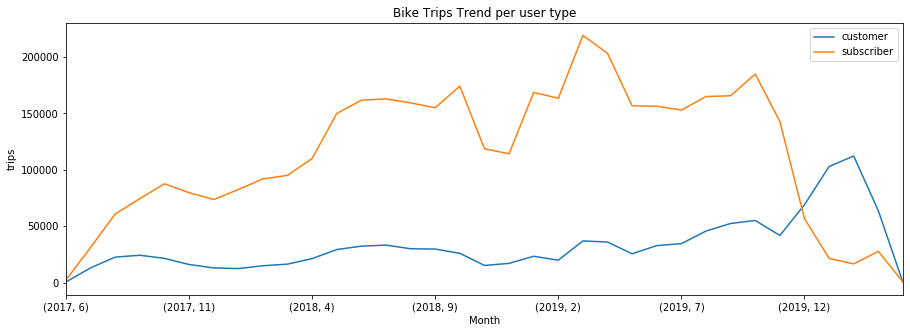

In [24]:
## trips for both customers and subscriber separately 
customer = df[df['user_type'] == 'Customer']
subscriber = df[df['user_type'] == 'Subscriber']

group_by_date_cust = customer.groupby([customer["start_date"].dt.year, customer["start_date"].dt.month]).count()
group_by_date_sub = subscriber.groupby([subscriber["start_date"].dt.year, subscriber["start_date"].dt.month]).count()

group_by_date_cust['bike_id'].plot(kind='line' ,figsize = (15,5) )
group_by_date_sub['bike_id'].plot(kind='line' ,figsize = (15,5) )

plt.xlabel('Month')
plt.ylabel('trips')
plt.legend(('customer' , 'subscriber'))
plt.title('Bike Trips Trend per user type')
plt.show()


#### Subscribers mostly follow the general trend of the trips, they are also affected by seasonality

#### While customers have a uniform trend more or less, there's a spike at the beginning of 2020 in Customer User Type Activity that might show a certain event 


### Research Question 3: What is the percentage share of each user type?

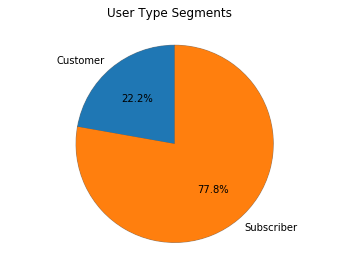

In [28]:
## calculating percentage of customers and subscribers out of total
customer_perc = (df.query('user_type == "Customer"')['bike_id'].count()) / df['user_type'].count()
subscriber_perc = (df.query('user_type == "Subscriber"')['bike_id'].count()) / df['user_type'].count()
 

plt.pie([customer_perc, subscriber_perc], explode=(0, 0.1), labels=['Customer', 'Subscriber'],
        autopct='%1.1f%%', shadow=True, startangle=90  ,radius=3000)

plt.axis('equal')
plt.suptitle('User Type Segments')
plt.show()

#### 78% of the users are subscribers, this explain why the average trend looks like the trend of the subscribers

### Research Question 4: What is the trend of bike rides over weekday?

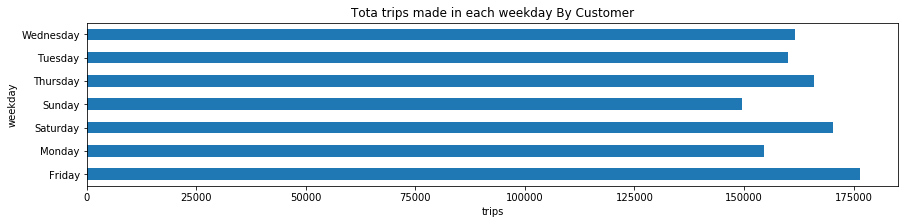

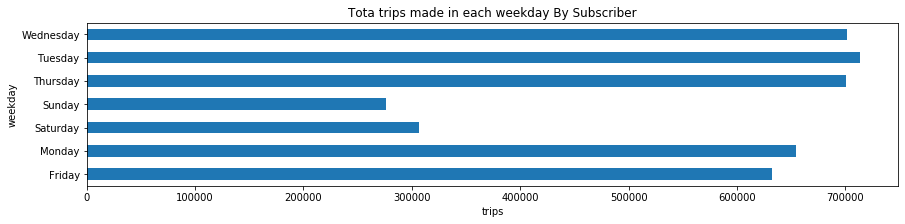

In [66]:
## activity on weekday per user type


group_by_day_cust = customer.groupby('weekday').count()
group_by_day_sub = subscriber.groupby('weekday').count()

plt.subplot(1, 2, 1)
group_by_day_cust['bike_id'].plot(kind='barh' , figsize = (32,3))
plt.xlabel('trips')
plt.ylabel('weekday')
plt.title('Tota trips made in each weekday By Customer')
plt.show()

plt.subplot(1, 2, 2)
group_by_day_sub['bike_id'].plot(kind='barh' , figsize = (32,3) )
plt.xlabel('trips')
plt.ylabel('weekday')
plt.title('Tota trips made in each weekday By Subscriber')
plt.show()


#### Customers have uniform usage trends over the week, While subscribers usually has less activity during weekends

### Research Question 4: What are the peak hours of usage for each user type?

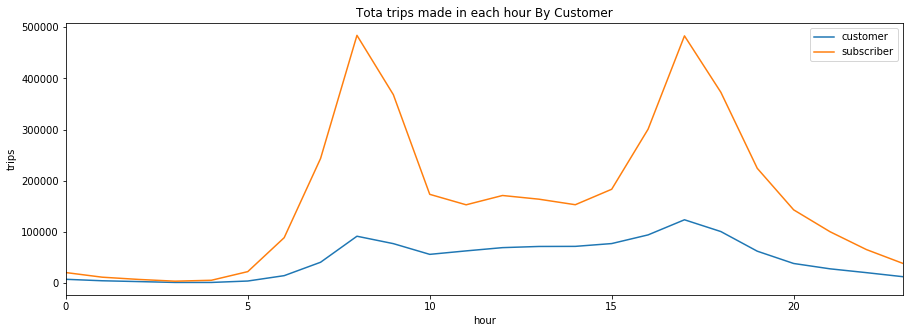

In [68]:
## activity per hour per user type
group_by_day_cust = customer.groupby('start_hour').count()
group_by_day_sub = subscriber.groupby('start_hour').count()


group_by_day_cust['bike_id'].plot(kind='line' , figsize = (15,5))
group_by_day_sub['bike_id'].plot(kind='line', figsize = (15,5) )

plt.xlabel('hour')
plt.ylabel('trips')
plt.legend(('customer' , 'subscriber'))
plt.title('Tota trips made in each hour By Customer')
plt.show()

#### Usually, Subscribers have spikes in usage in the early morning (7h to 9h) and in the evening (16h to 19h)

#### Customers also have a slight peak in the mentioned hours but in a uniform trend

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle.tpl

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 468512 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck.slides.html
Use Control-C to stop this server
